In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, datasets , models


In [28]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


/tmp/ipykernel_34542/260140420.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


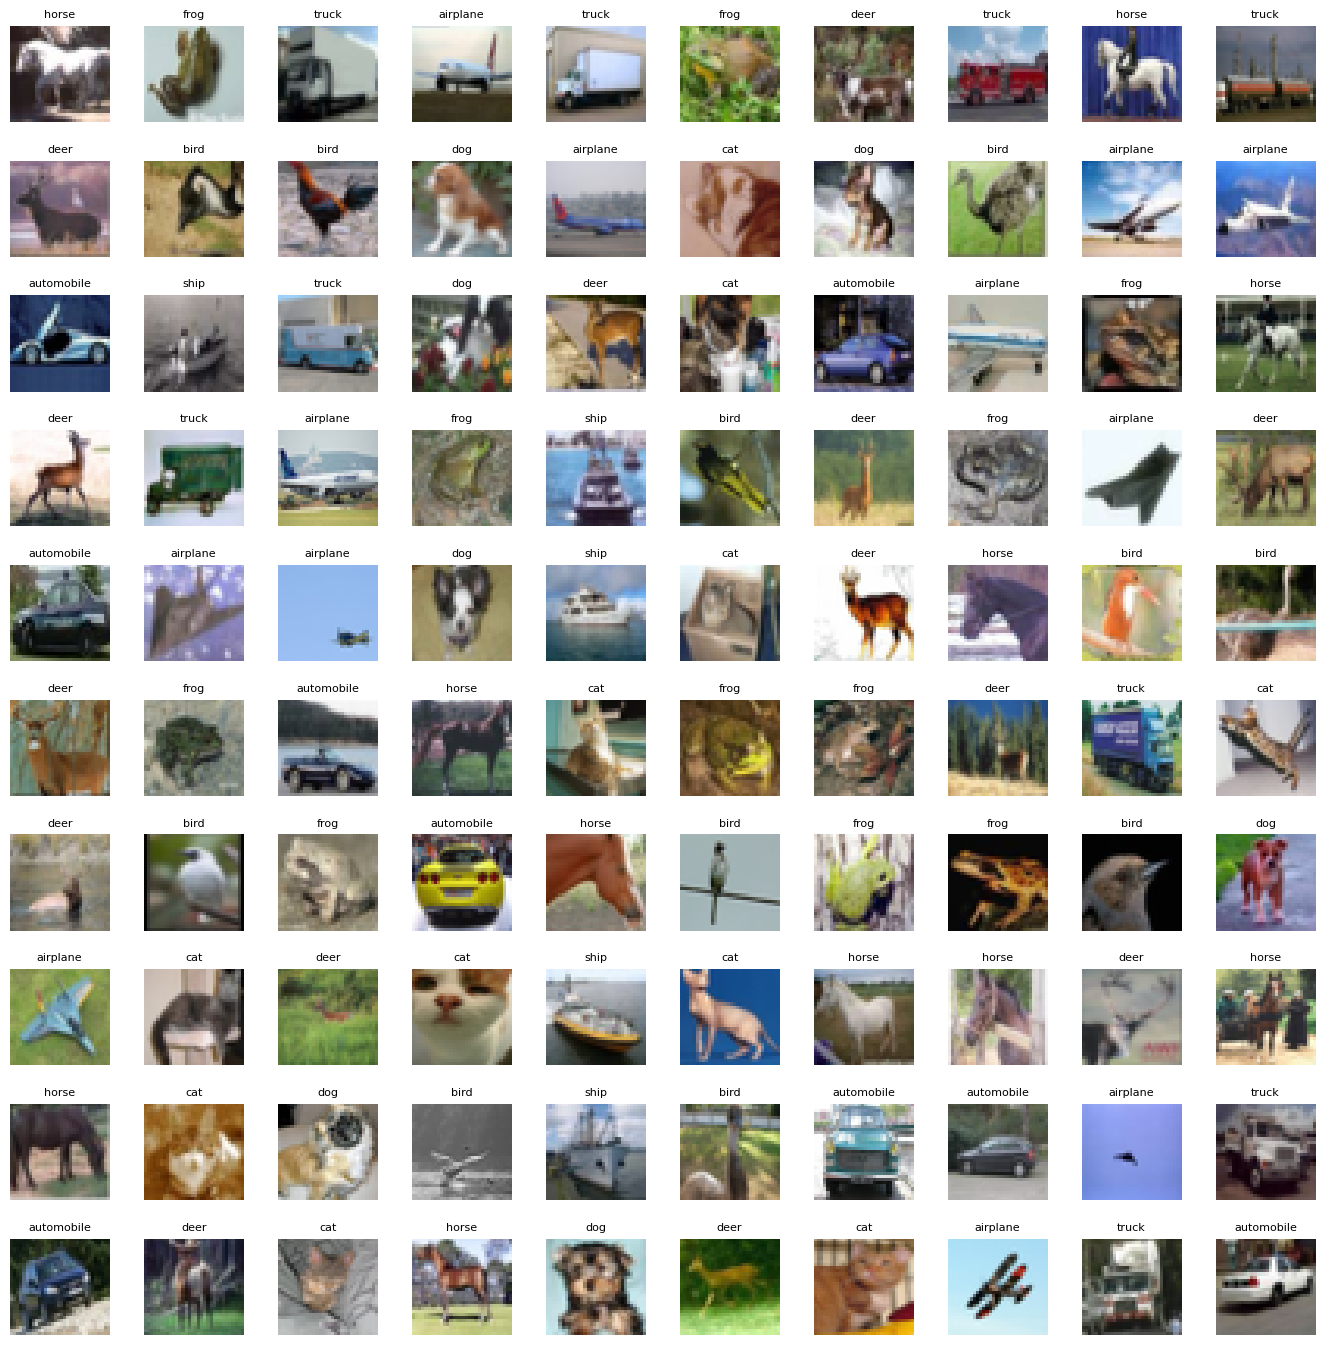

In [29]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [3]:
X_test.shape


(10000, 32, 32, 3)

In [4]:
X_train.shape


(50000, 32, 32, 3)

In [5]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)


In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


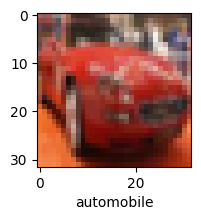

In [10]:
plot_sample(X_train, y_train, 5)


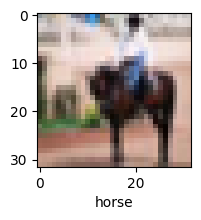

In [11]:
plot_sample(X_train, y_train, 11)


In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [13]:
ann = models.Sequential([
 layers.Flatten(input_shape=(32, 32, 3)),  # Reshape the input shape to (32, 32, 3)
 layers.Dense(100, activation='relu'),
 layers.Dense(50, activation='relu'),
 layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)


/home/ahmedalaa/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


2024-05-14 19:53:20.604245: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2651 - loss: 2.0052
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3782 - loss: 1.7359
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4042 - loss: 1.6624
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4237 - loss: 1.6070
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4315 - loss: 1.5909


In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report : \n', classification_report(y_test, y_pred_classes))


 21/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

2024-05-14 19:54:04.285257: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
classification report : 
               precision    recall  f1-score   support

           0       0.48      0.50      0.49      1000
           1       0.52      0.60      0.55      1000
           2       0.32      0.24      0.27      1000
           3       0.35      0.14      0.20      1000
           4       0.33      0.47      0.39      1000
           5       0.37      0.30      0.34      1000
           6       0.51      0.38      0.44      1000
           7       0.36      0.66      0.46      1000
           8       0.50      0.65      0.56      1000
           9       0.63      0.32      0.43      1000

    accuracy                           0.43     10000
   macro avg       0.44      0.43      0.41     10000
weighted avg       0.44      0.43      0.41     10000



In [15]:
cnn = models.Sequential([
 layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax'),
])


/home/ahmedalaa/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=15)


Epoch 1/15


2024-05-14 19:54:07.262712: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.3797 - loss: 1.7099
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5806 - loss: 1.1877
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6363 - loss: 1.0454
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6747 - loss: 0.9402
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6938 - loss: 0.8849
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7124 - loss: 0.8311
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7309 - loss: 0.7740
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7499 - loss: 0.7252
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7641 - loss: 0.6817
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7782 - loss: 0.6461
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7889 - loss: 0.6169
Epoch 12/15
1563/15

In [17]:
cnn.evaluate(X_test,y_test)


2024-05-14 20:01:48.189501: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6883 - loss: 1.0112


[1.0099382400512695, 0.6891999840736389]

In [18]:
y_pred = cnn.predict(X_test)


  8/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step   

2024-05-14 20:01:51.443030: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [19]:
y_pred[:5]


array([[2.9803335e-04, 2.9518162e-07, 1.6512616e-03, 8.7088895e-01,
        1.3413841e-03, 1.1851687e-01, 7.1387175e-03, 1.9383073e-05,
        1.4495911e-04, 2.2133946e-07],
       [4.8726704e-04, 2.1011439e-01, 2.8266708e-10, 1.4262044e-06,
        5.0210511e-09, 3.6704137e-08, 3.6742837e-10, 5.4251618e-08,
        7.8724962e-01, 2.1472552e-03],
       [4.2856298e-03, 6.7104799e-01, 4.5676122e-04, 5.0394130e-03,
        9.2765177e-04, 1.9255395e-04, 7.6911410e-06, 2.6907297e-04,
        2.3465115e-01, 8.3122022e-02],
       [9.7658789e-01, 3.8061258e-03, 7.3661230e-04, 5.4558879e-04,
        3.8728979e-03, 7.0201583e-07, 1.1422902e-06, 3.2296346e-05,
        1.3256020e-02, 1.1607137e-03],
       [2.9617654e-06, 7.7938779e-08, 2.2639830e-02, 8.7418564e-02,
        6.6571164e-01, 3.4452875e-03, 2.2075246e-01, 1.2742890e-06,
        2.7245032e-05, 7.0672417e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 1, 0, 4]

In [21]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

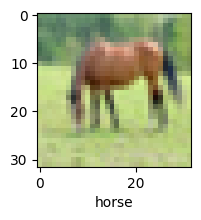

In [22]:
plot_sample(X_test, y_test,60)


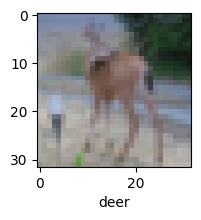

In [23]:
plot_sample(X_test, y_test, 100)


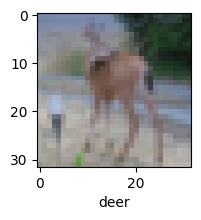

In [24]:
plot_sample(X_test, y_test, 100)


In [25]:
cnn.save('model1.h5')


In [26]:
ann.save('ggg.h5')
